<a href="https://colab.research.google.com/github/klydejayyy/Automated-Workout-Routine-Generator/blob/main/Body_type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Jan 16 07:55:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [ ]:
# import the libraries

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/THESIS/Datasets/train'
valid_path = '/content/drive/MyDrive/THESIS/Datasets/test'

In [ ]:
# Import the InceptionV3 library and add preprocessing layer
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# for not training existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# for getting number of output classes
folders = glob('/content/drive/MyDrive/THESIS/Datasets/train/*')

In [ ]:
folders

['/content/drive/MyDrive/THESIS/Datasets/train/normalweight',
 '/content/drive/MyDrive/THESIS/Datasets/train/underweight',
 '/content/drive/MyDrive/THESIS/Datasets/train/overweight']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/THESIS/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 616 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/THESIS/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 138 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-20-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
39/39 [==============================] - 55s 1s/step - loss: 4.2222 - accuracy: 0.6315 - val_loss: 3.3925 - val_accuracy: 0.7029
Epoch 2/20
39/39 [==============================] - 25s 632ms/step - loss: 1.9344 - accuracy: 0.7386 - val_loss: 2.3942 - val_accuracy: 0.6957
Epoch 3/20
39/39 [==============================] - 23s 584ms/step - loss: 1.1357 - accuracy: 0.8328 - val_loss: 2.2088 - val_accuracy: 0.7319
Epoch 4/20
39/39 [==============================] - 24s 605ms/step - loss: 0.5345 - accuracy: 0.8977 - val_loss: 3.1542 - val_accuracy: 0.6232
Epoch 5/20
39/39 [==============================] - 21s 545ms/step - loss: 0.5302 - accuracy: 0.9042 - val_loss: 2.6058 - val_accuracy: 0.7029
Epoch 6/20
39/39 [==============================] - 21s 539ms/step - loss: 0.5407 - accuracy: 0.9091 - val_loss: 2.4091 - val_accuracy: 0.7174
Epoch 7/20
39/39 [==============================] - 24s 616ms/step - loss: 0.3676 - accuracy: 0.9269 - val_loss: 3.4257 - val_accuracy: 0.7029
Ep

In [ ]:
import matplotlib.pyplot as plt

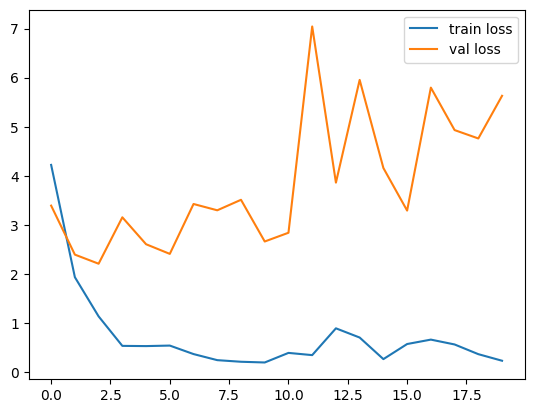

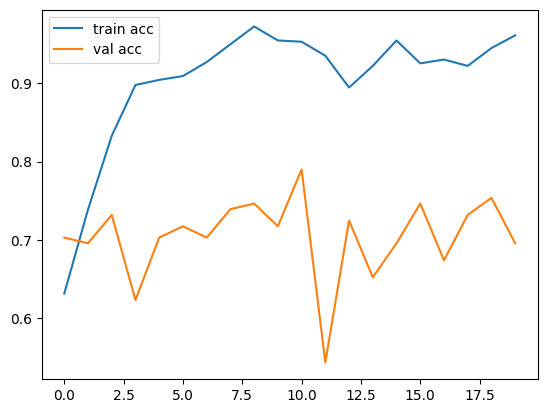

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(test_set)

9/9 [==============================] - 3s 172ms/step


In [ ]:
y_pred

array([[1.28301437e-07, 2.11800711e-04, 9.99788105e-01],
       [9.99994278e-01, 3.68695482e-21, 5.72637464e-06],
       [9.99999881e-01, 1.69258300e-07, 1.00365412e-21],
       [1.00000000e+00, 3.02186425e-21, 2.41813034e-17],
       [5.03430456e-05, 1.62546898e-09, 9.99949694e-01],
       [1.59689785e-16, 1.00000000e+00, 5.20862101e-21],
       [1.00000000e+00, 1.36678997e-24, 1.21289242e-16],
       [1.00000000e+00, 3.10834893e-20, 6.17196627e-10],
       [1.23047785e-20, 1.00000000e+00, 2.68981635e-27],
       [4.46576346e-03, 9.68208269e-07, 9.95533228e-01],
       [2.51288543e-06, 1.24552571e-12, 9.99997497e-01],
       [1.46040562e-04, 5.82344548e-17, 9.99853969e-01],
       [5.73236568e-22, 7.99413549e-16, 1.00000000e+00],
       [1.00000000e+00, 2.45699348e-20, 1.51482132e-17],
       [1.23776101e-06, 9.99998808e-01, 1.95299820e-26],
       [7.77369976e-01, 2.22626060e-01, 3.97900067e-06],
       [3.02192310e-20, 2.07079007e-26, 1.00000000e+00],
       [1.00000000e+00, 4.57502

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       0, 0, 1, 0, 2, 1])

In [ ]:
from keras.models import load_model
from keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/THESIS/Datasets/validation/overweight/download (4).jpg',target_size=(224,224))


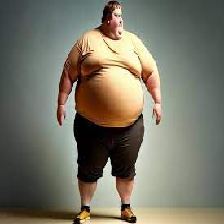

In [ ]:
img

In [ ]:
x=image.img_to_array(img)
x

array([[[ 52.,  60.,  62.],
        [ 52.,  60.,  62.],
        [ 53.,  61.,  63.],
        ...,
        [ 61.,  70.,  67.],
        [ 58.,  67.,  64.],
        [ 58.,  67.,  64.]],

       [[ 52.,  60.,  62.],
        [ 52.,  60.,  62.],
        [ 53.,  61.,  63.],
        ...,
        [ 61.,  70.,  67.],
        [ 58.,  67.,  64.],
        [ 58.,  67.,  64.]],

       [[ 53.,  61.,  63.],
        [ 53.,  61.,  63.],
        [ 53.,  61.,  63.],
        ...,
        [ 61.,  70.,  67.],
        [ 59.,  68.,  65.],
        [ 59.,  68.,  65.]],

       ...,

       [[116.,  99.,  73.],
        [116.,  99.,  73.],
        [116.,  99.,  73.],
        ...,
        [142., 127.,  96.],
        [138., 127.,  99.],
        [138., 127.,  99.]],

       [[121., 104.,  78.],
        [121., 104.,  78.],
        [121., 104.,  78.],
        ...,
        [145., 130.,  99.],
        [140., 129., 101.],
        [140., 129., 101.]],

       [[125., 108.,  82.],
        [125., 108.,  82.],
        [125., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 39ms/step


array([[1.2971867e-05, 9.9262106e-01, 7.3659429e-03]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 29ms/step


In [ ]:
a

array([1])

In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 10.1 M

In [11]:
import gradio as gr
import requests
import tensorflow as tf
import numpy as np
from keras.models import load_model
from keras.preprocessing import image

inception_model = load_model('/content/drive/MyDrive/THESIS/model_inception.h5')

response = requests.get("https://github.com/klydejayyy/Automated-Workout-Routine-Generator/blob/main/body-labels.txt")
labels = response.text.split("\n")

def classify_image(inp):
  inp = inp.reshape((-1, 224, 224, 3)/255)
  inp = preprocess_input(inp)
  prediction = inception_model.predict(inp).flatten()

  confidences = {labels[i]: float(prediction[i]) for i in range(1000)}
  return confidences


gr.Interface(fn=classify_image,
             inputs=gr.Image(),
             outputs=gr.Label(num_top_classes=3)).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5116e4b34a039a74d2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
